1. Data Loading and Initial Exploration python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, silhouette_score, mean_squared_error
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('/content/Car_Data.csv')

# Display basic information
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB
None
   ID       Brand            Model  Year   Color  Mileage  Price Condition
0   1       Mazda  Generic Model 3  2003    Blue    22932  65732       New
1   2      Jaguar  Generic Model 2  2003  Silver    89937  58620       New
2   3  Land Rover  Generic Model 2  2022   Green    36616  50574       New
3   4     Porsche  Generic Model 2  1997   Black    82812  35436      Used
4   5  Land Rover  Generic Model 3  2000   Black   184616  63

2. Data Preprocessing

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64


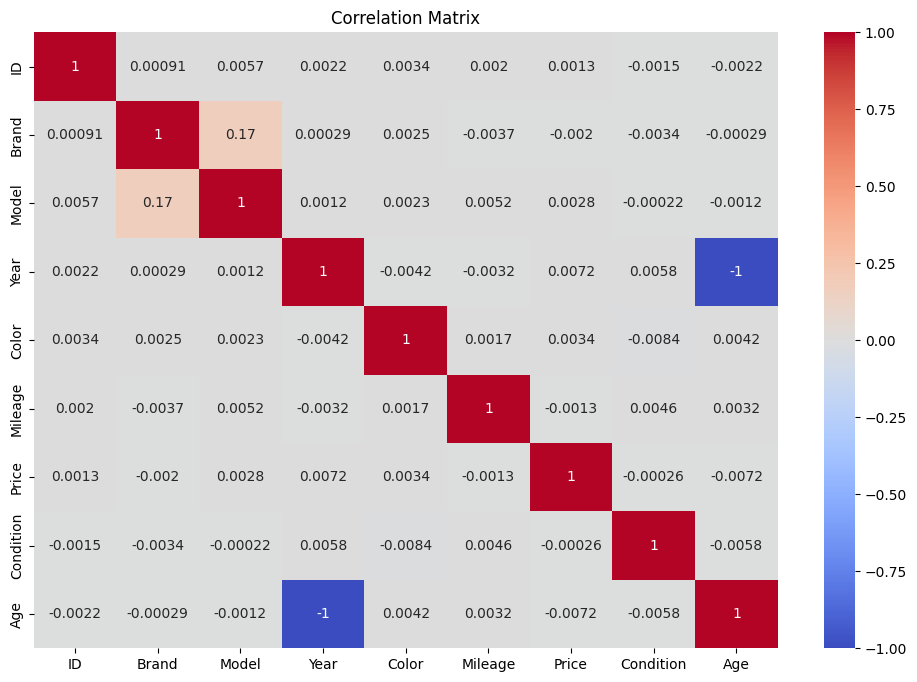

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle duplicates
df = df.drop_duplicates()

# Convert categorical variables to numerical
le = LabelEncoder()
categorical_cols = ['Brand', 'Model', 'Color', 'Condition']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature engineering - create age of car
current_year = 2023
df['Age'] = current_year - df['Year']

# Check correlation
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3. Data Distribution Visualization

1) Distribution of Year

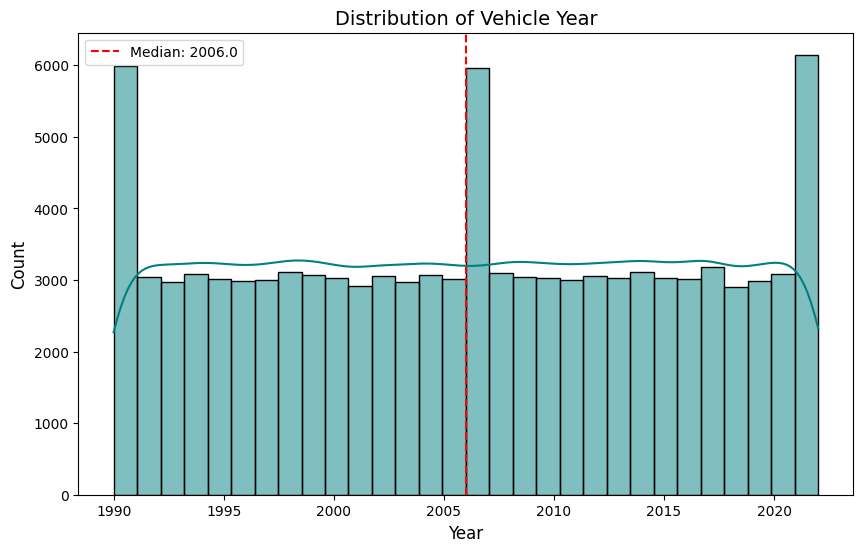

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=30, kde=True, color='teal')
plt.axvline(df['Year'].median(), color='red', linestyle='--', label=f'Median: {df["Year"].median()}')
plt.title('Distribution of Vehicle Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

2) Distribution of Brand (Top 20)

<ipython-input-8-d9e44638b386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')


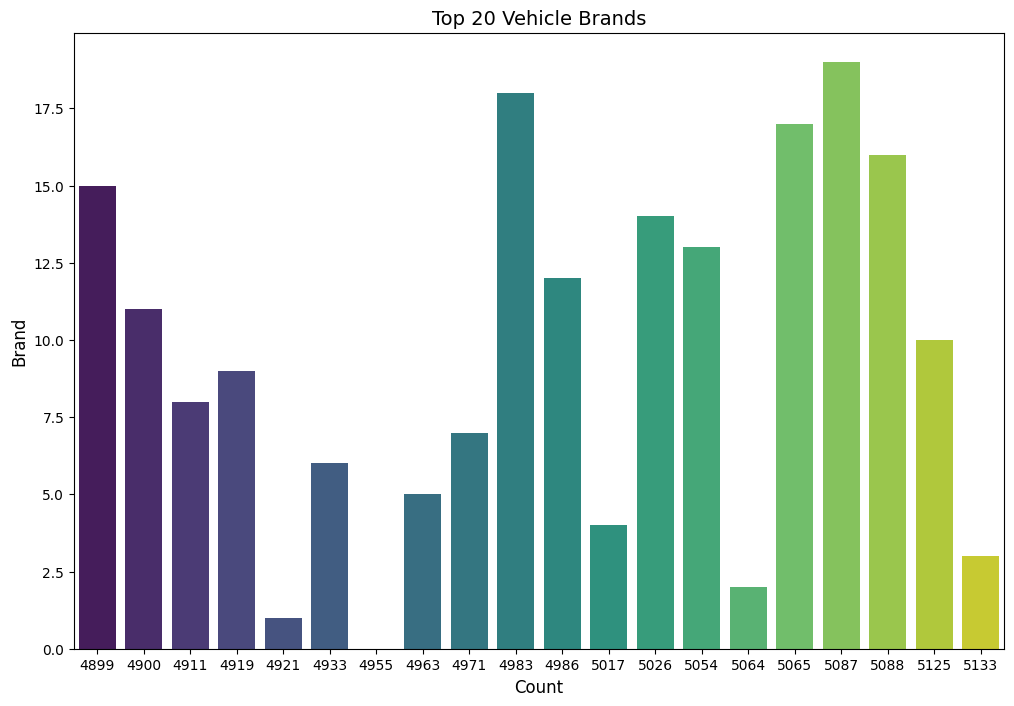

In [8]:
plt.figure(figsize=(12, 8))
brand_counts = df['Brand'].value_counts().nlargest(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title('Top 20 Vehicle Brands', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

3) Distribution of Model

<ipython-input-25-02dca671fe38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette='Set2')


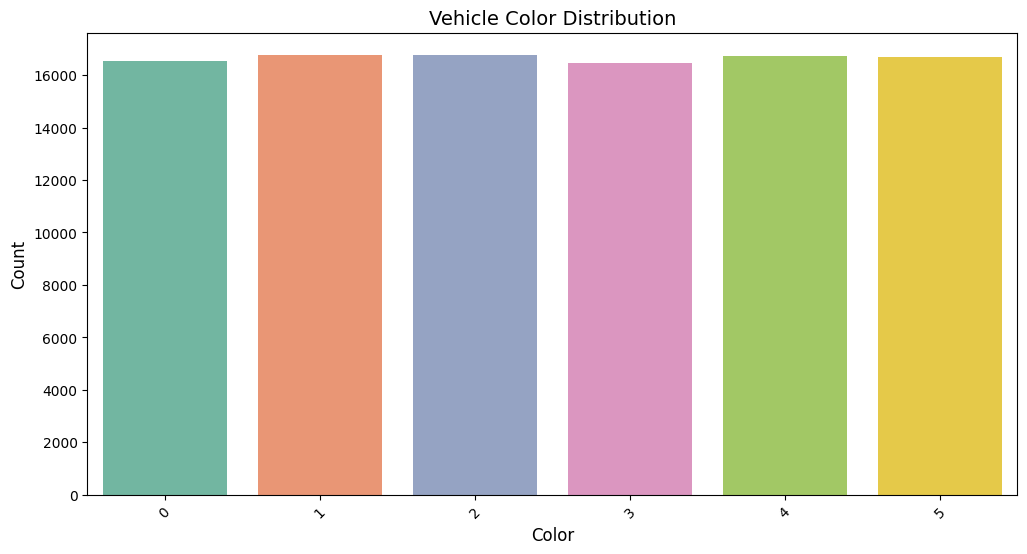

In [25]:
plt.figure(figsize=(12, 6))
color_counts = df['Color'].value_counts()
sns.barplot(x=color_counts.index, y=color_counts.values, palette='Set2')
plt.title('Vehicle Color Distribution', fontsize=14)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

 5) Distribution of Condition

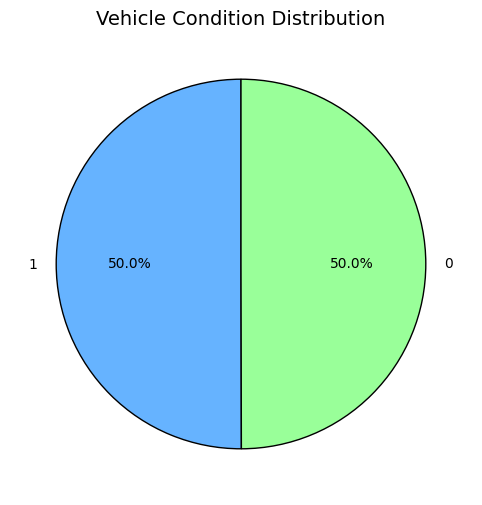

In [26]:
plt.figure(figsize=(8, 6))
condition_counts = df['Condition'].value_counts()
plt.pie(condition_counts, labels=condition_counts.index,
        autopct='%1.1f%%', colors=['#66b3ff','#99ff99'],
        startangle=90, wedgeprops={'edgecolor':'black'})
plt.title('Vehicle Condition Distribution', fontsize=14)
plt.show()

6) Distribution of Price

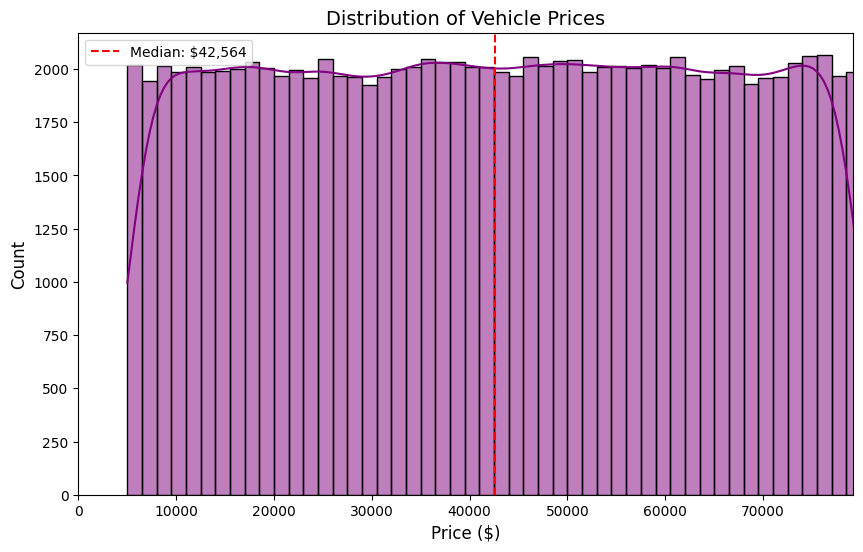

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='purple')
plt.axvline(df['Price'].median(), color='red', linestyle='--',
            label=f'Median: ${df["Price"].median():,.0f}')
plt.title('Distribution of Vehicle Prices', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, df['Price'].quantile(0.99))  # Remove extreme outliers
plt.legend()
plt.show()

7) Distribution of Age

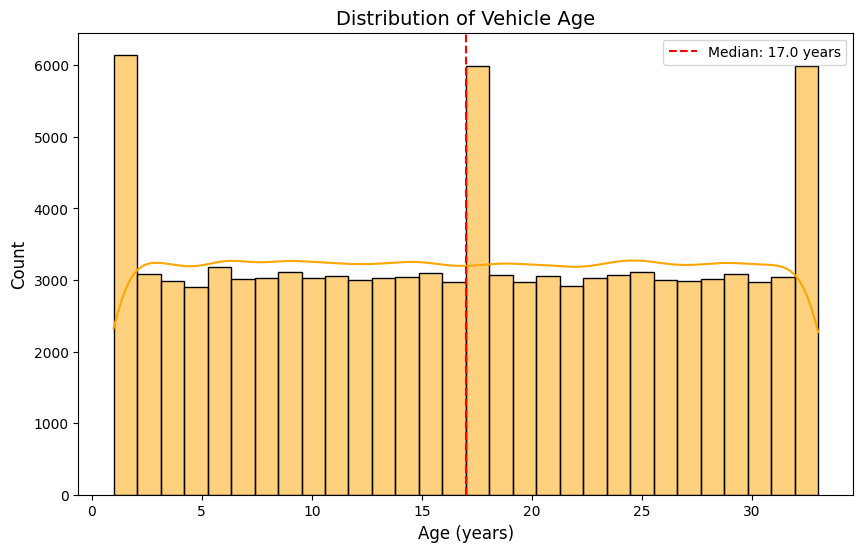

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.axvline(df['Age'].median(), color='red', linestyle='--',
            label=f'Median: {df["Age"].median()} years')
plt.title('Distribution of Vehicle Age', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.show()

8) Distribution of Mileage

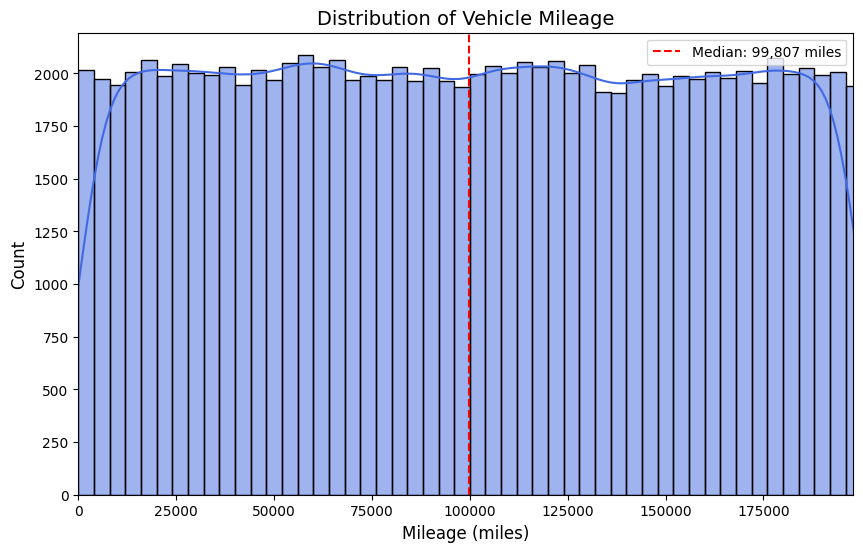

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=50, kde=True, color='royalblue')
plt.axvline(df['Mileage'].median(), color='red', linestyle='--',
            label=f'Median: {df["Mileage"].median():,.0f} miles')
plt.title('Distribution of Vehicle Mileage', fontsize=14)
plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, df['Mileage'].quantile(0.99))  # Remove extreme outliers
plt.legend()
plt.show()

9) Price distribution by brand

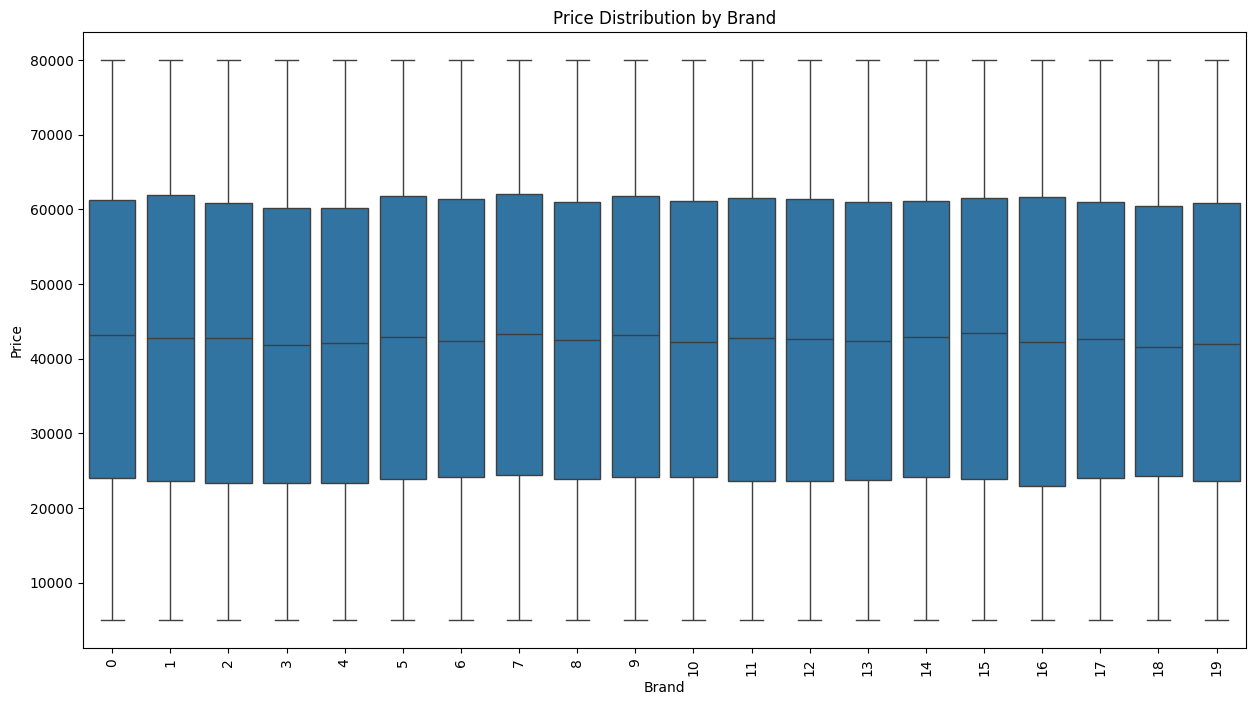

In [15]:
# Price distribution by brand
plt.figure(figsize=(15, 8))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

4. Advanced EDA

Price vs Mileage colored by Condition

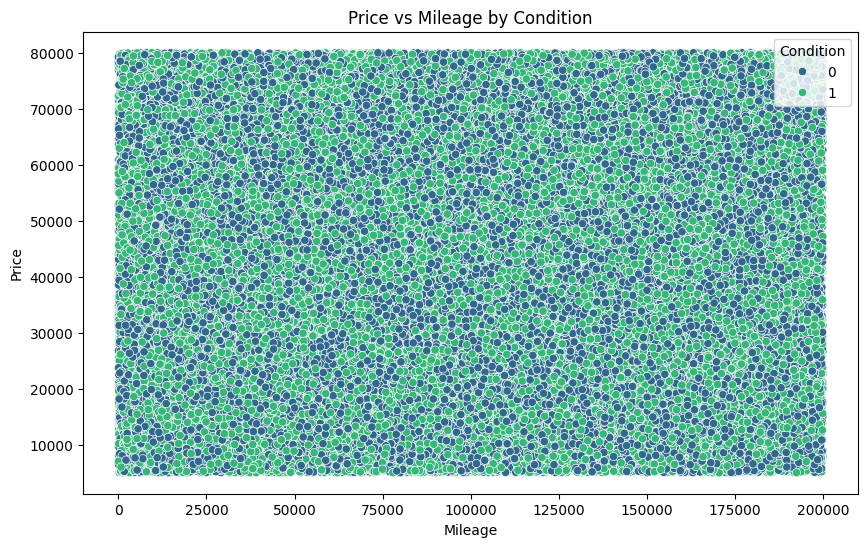

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Condition', data=df, palette='viridis')
plt.title('Price vs Mileage by Condition')
plt.show()

Average price by brand and condition

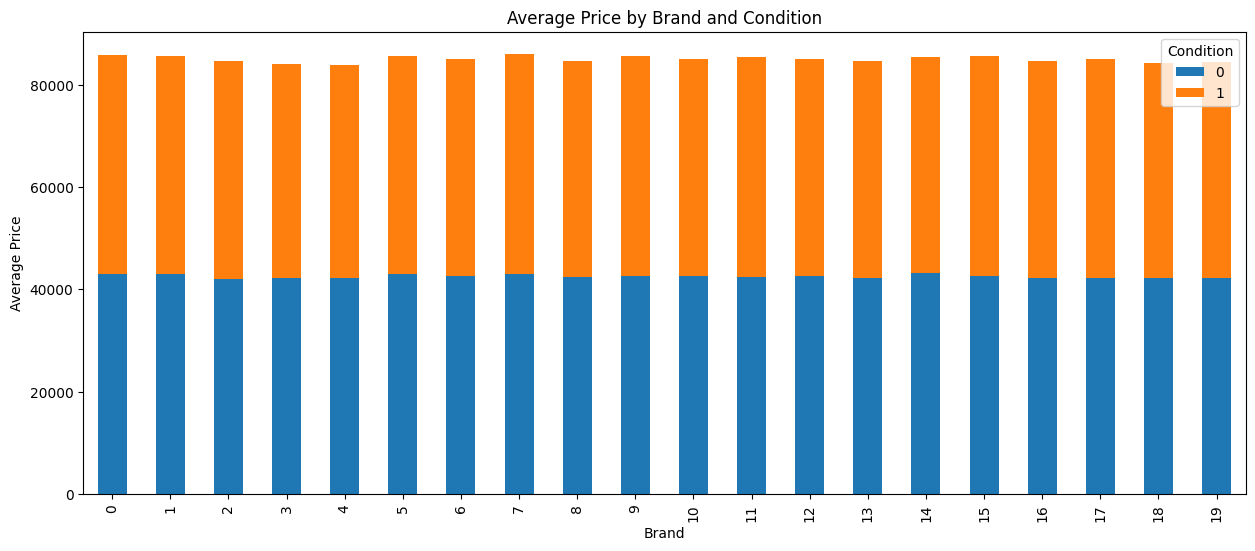

In [8]:
avg_price = df.groupby(['Brand', 'Condition'])['Price'].mean().unstack()
avg_price.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Average Price by Brand and Condition')
plt.ylabel('Average Price')
plt.show()

Age distribution by condition

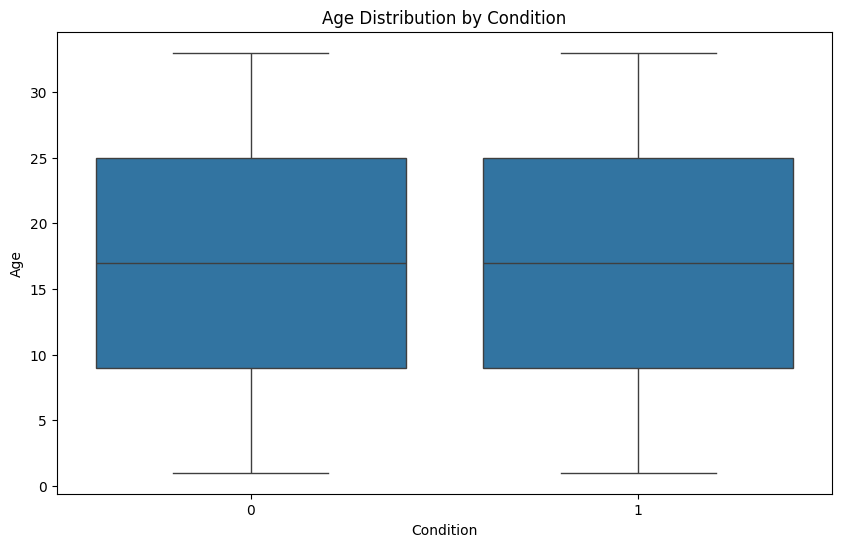

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Age', data=df)
plt.title('Age Distribution by Condition')
plt.show()

5. Classification (Predicting Car Condition)

              precision    recall  f1-score   support

           0       0.50      0.62      0.55     14997
           1       0.50      0.38      0.43     15003

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



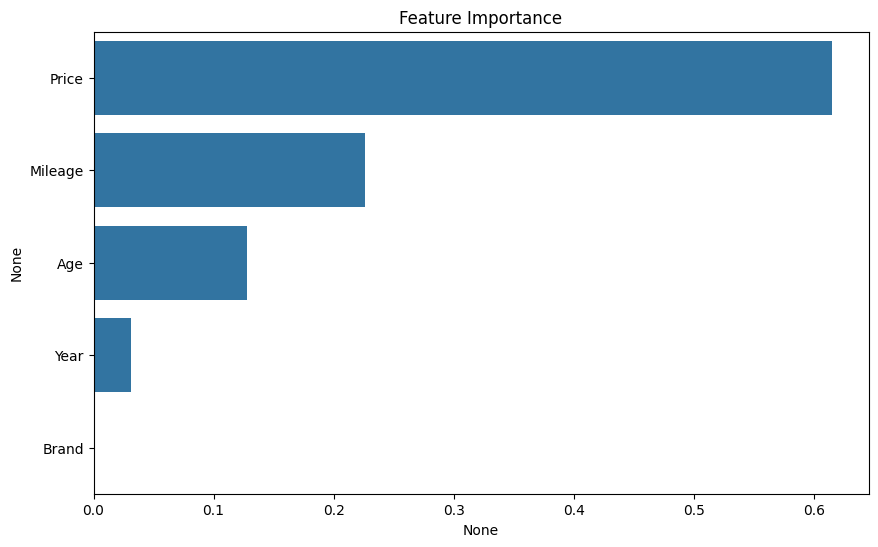

In [30]:
# Prepare data for classification
X = df[['Brand', 'Year', 'Mileage', 'Price', 'Age']]
y = df['Condition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

6. Visualization of Decision Tree

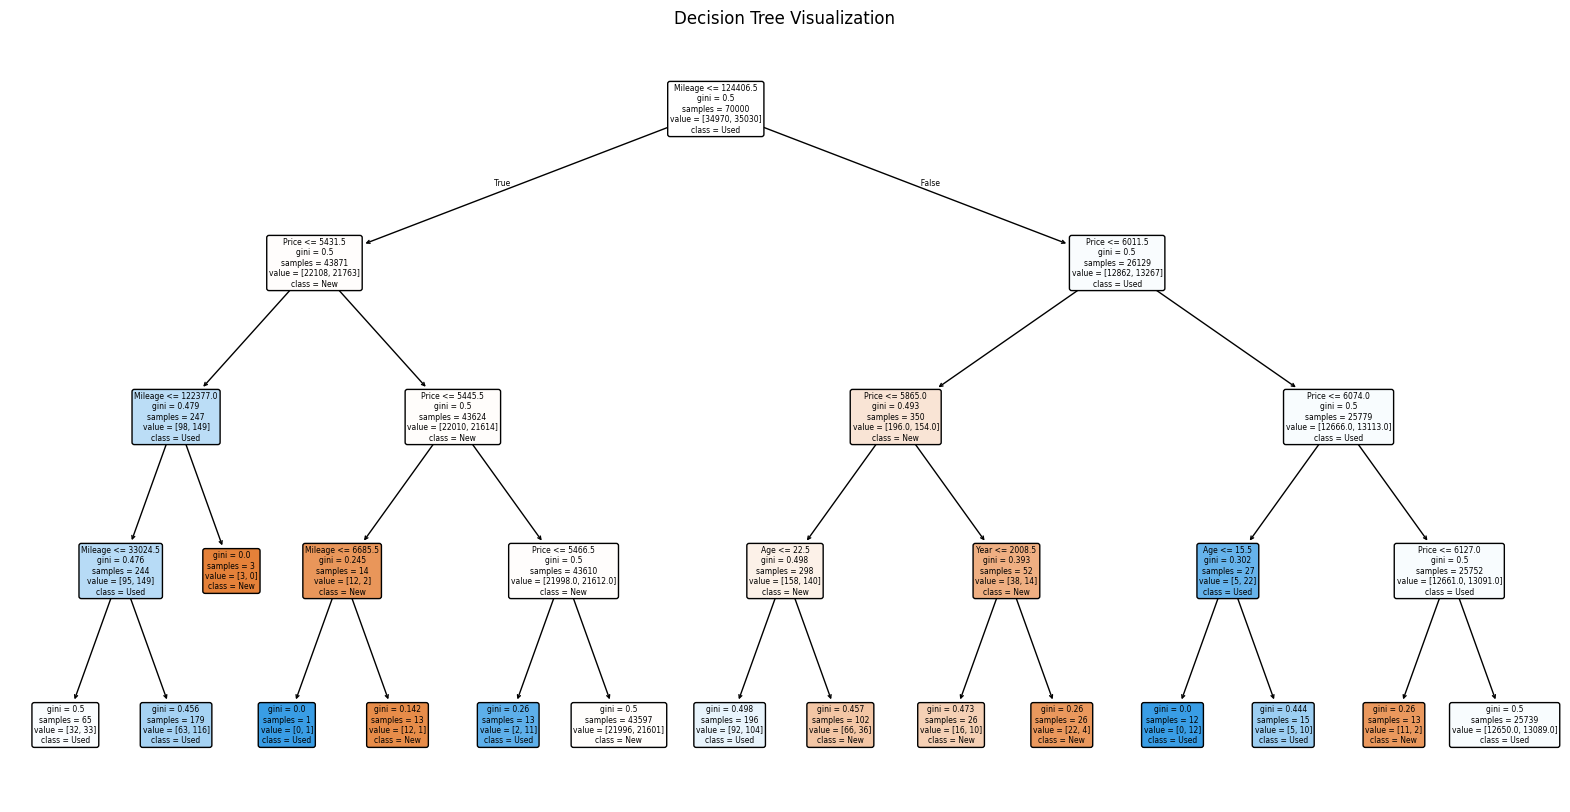

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['New', 'Used'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

7. Clustering (Grouping Similar Cars)

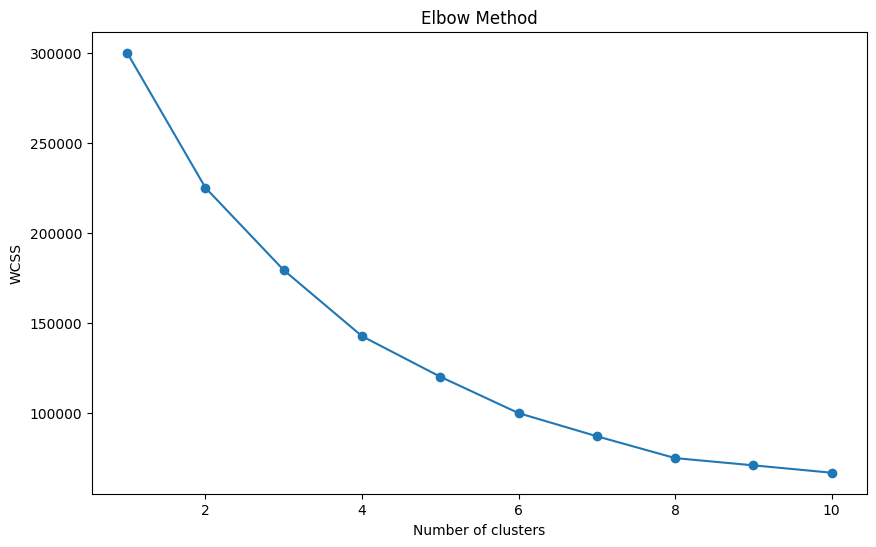

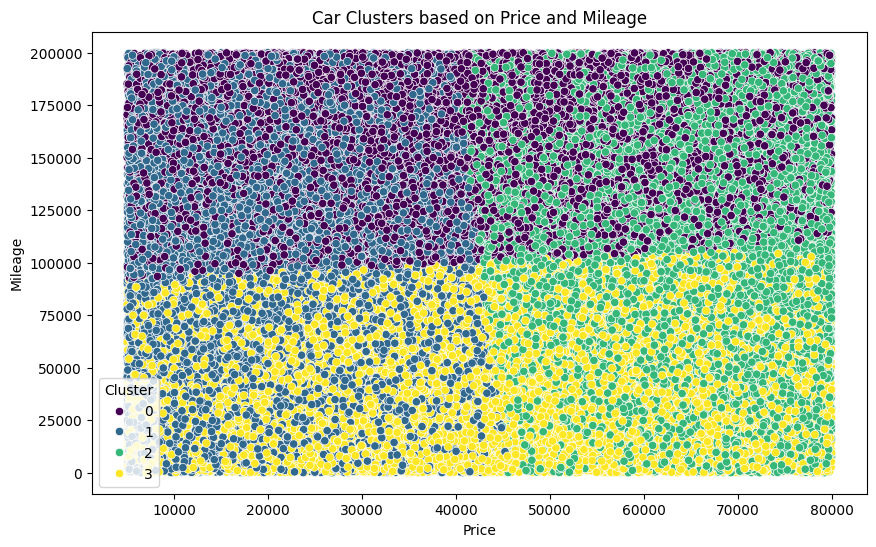

In [7]:
# Select features for clustering
cluster_features = df[['Price', 'Mileage', 'Age']]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering with optimal clusters (let's say 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Mileage', hue='Cluster', data=df, palette='viridis')
plt.title('Car Clusters based on Price and Mileage')
plt.show()

8. Association Rule Mining (Finding Car Feature Associations)

Unique values in transaction matrix: [1 0]


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
3        (New_Car)    (High_Price)             0.12217             0.50000   
2     (High_Price)       (New_Car)             0.50000             0.12217   
8   (High_Mileage)       (New_Car)             0.49999             0.12217   
9        (New_Car)  (High_Mileage)             0.12217             0.49999   
14  (High_Mileage)       (Color_5)             0.49999             0.16703   
15       (Color_5)  (High_Mileage)             0.16703             0.49999   
7        (Color_5)    (High_Price)             0.16703             0.50000   
6     (High_Price)       (Color_5)             0.50000             0.16703   
4     (High_Price)       (Color_4)             0.50000             0.16745   
5        (Color_4)    (High_Price)             0.16745             0.50000   

    support  confidence      lift  representativity  leverage  conviction  \
3   0.06163    0.504461  1.008922       

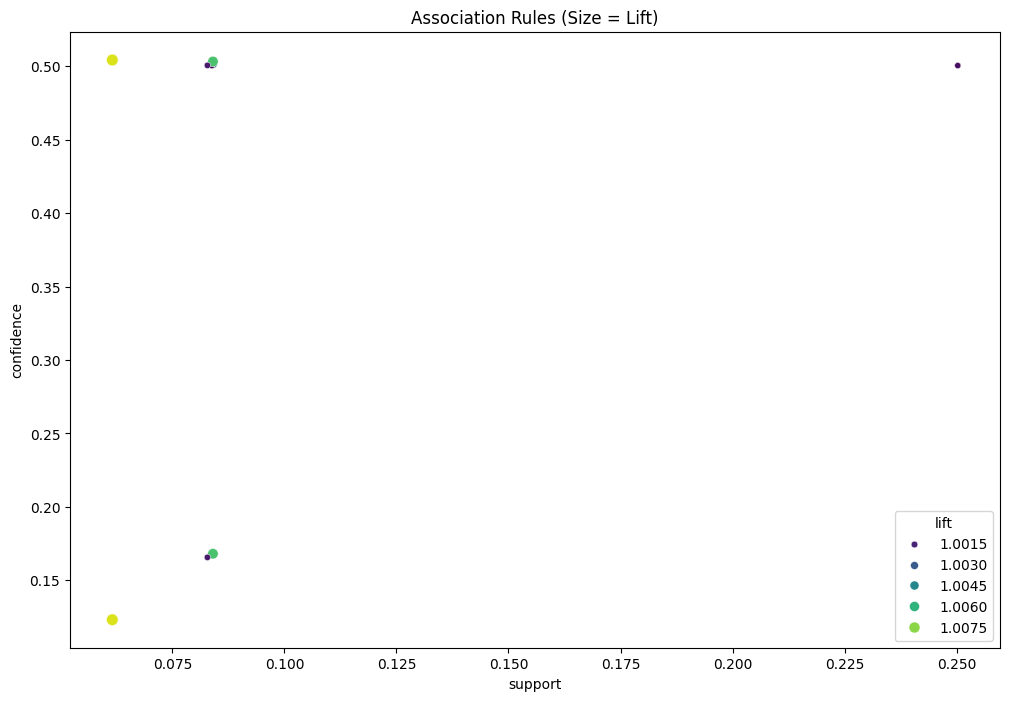

In [18]:
# Prepare data for association rules
df_assoc = df.copy()

# Create binary features
df_assoc['High_Price'] = (df['Price'] > df['Price'].median()).astype(int)
df_assoc['High_Mileage'] = (df['Mileage'] > df['Mileage'].median()).astype(int)
df_assoc['New_Car'] = (df['Age'] < 5).astype(int)

# Convert categorical variables to binary indicators
# We'll limit to top N categories to avoid too many columns
top_brands = df['Brand'].value_counts().nlargest(10).index
top_colors = df['Color'].value_counts().nlargest(5).index

# Create binary columns for top brands and colors
for brand in top_brands:
    df_assoc[f'Brand_{brand}'] = (df['Brand'] == brand).astype(int)

for color in top_colors:
    df_assoc[f'Color_{color}'] = (df['Color'] == color).astype(int)

# Select only the binary columns for association rules
binary_cols = [col for col in df_assoc.columns if col.startswith('Brand_') or
               col.startswith('Color_') or col in ['High_Price', 'High_Mileage', 'New_Car']]
transaction_matrix = df_assoc[binary_cols]

# Verify all values are 0 or 1 - CORRECTED VERSION
print("Unique values in transaction matrix:", pd.unique(transaction_matrix.values.ravel()))

# Find frequent itemsets with adjusted min_support
frequent_itemsets = apriori(transaction_matrix, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
print("\nTop Association Rules:")
print(rules.sort_values('lift', ascending=False).head(10))

# Visualize rules
plt.figure(figsize=(12, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis')
plt.title('Association Rules (Size = Lift)')
plt.show()

9. Regression (Predicting Car Price)

Mean Squared Error: 467931185.2652445
R-squared: -1.8792844881598825e-05


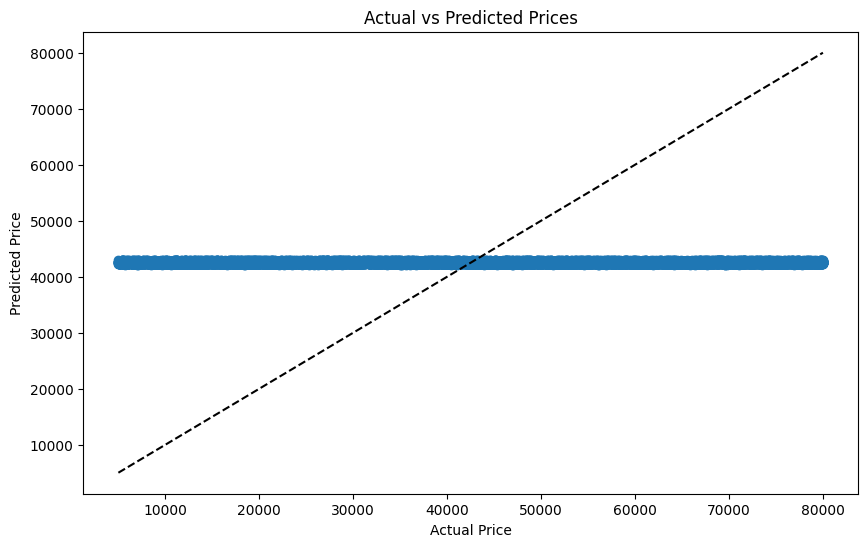

In [22]:
# Prepare data for regression
X_reg = df[['Brand', 'Year', 'Mileage', 'Age', 'Condition']]
y_reg = df['Price']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train linear regression model
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

# Evaluate
y_pred_reg = reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {reg.score(X_test_reg, y_test_reg)}")

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()